In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [2]:
os.chdir("/home/matvey/data/LshCas13a_RNA_cleavage/LshCas13a_in_vitro_total_RNA/")

In [3]:
merged_TCS_table = pd.read_csv("Results/Tables/TCS_detection_tables/LRTest_table_and_genome_features.tsv", 
                               sep="\t")
merged_TCS_table.loc[merged_TCS_table["MatchedFeatureType"].isin(["CDS", "tRNA", "rRNA"]) == False, "MatchedFeatureType"] = "other"

CDS
tRNA
rRNA
other


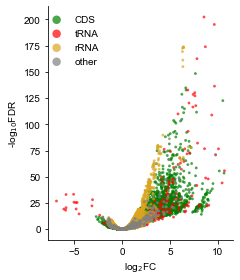

In [36]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10
figure = plt.figure()
volcano = figure.add_subplot()
#volcano.set_aspect(aspect=0.1)

colors_dict = {"CDS" : "green", "tRNA" : "red", "rRNA" : "goldenrod", "other" : "grey"}
dots_size=8
transparency=0.7

#features_list = set(WT_LRTable["MatchedFeatureType"].tolist()+d10LVM_LRTable["MatchedFeatureType"].tolist())

for feature in colors_dict.keys():
    print(feature)
    current_color = colors_dict[feature]
    
    volcano.scatter(x = merged_TCS_table[merged_TCS_table.MatchedFeatureType == feature]["logFC"].tolist(), 
                    y = -np.log10(merged_TCS_table[merged_TCS_table.MatchedFeatureType == feature]["PValue.adj"].tolist()), 
                    s = dots_size, 
                    label = feature, 
                    alpha = transparency, 
                    facecolors = "none", 
                    edgecolors = "none", 
                    c = current_color)

volcano.set_xlabel("log$_2$FC")
volcano.set_ylabel("-log$_{10}$FDR")
#volcano.set_title("A", size=15, weight='bold', loc='left')

volcano.spines['top'].set_visible(False)
volcano.spines['right'].set_visible(False)

handles, labels = volcano.get_legend_handles_labels()
figure.legend(handles, labels, 
              loc="upper right", bbox_to_anchor=(0.5,0.95), frameon=False, markerscale=3)

figure.tight_layout()
figure.align_labels()
figure.set_size_inches(3,4)

figure.savefig("Results/Pictures/in_vitro_total_RNA_volcano.png", 
               bbox_inches='tight', dpi=300)